In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("../../input/augmented_data/spectrum.csv", low_memory=False)

In [4]:
display(dataset.head().T, dataset.shape)

,0,1,2,3,4
320,23.767617,6.554332,-65.876227,-3.539452,-32.211329
321,8.541673,-3.982771,-52.107447,-25.36141,3.569451
322,-6.737708,-12.508809,-43.797257,-22.890028,-25.360113
323,-13.844851,-14.161707,-34.973131,-15.633461,-24.382165
324,-15.338898,-11.528857,-24.758405,-24.196508,-13.837212
...,...,...,...,...,...
classfication,0,0,0,0,0
negpos,0,0,0,0,0
medium,NaN,NaN,NaN,NaN,NaN
mediumclassification,NaN,NaN,NaN,NaN,NaN


(6400, 1338)

In [5]:
def preprocess_data(data):
    labels = data.columns[-7:]
    X = data.drop(labels, axis=1)
    X.columns = X.columns.astype(int)
    y = data['covid_status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)
  
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    return X_train, X_test, y_train_encoded, y_test_encoded

In [6]:
X_train, X_test, y_train, y_test = preprocess_data(dataset)

In [7]:
y_train.shape, y_test.shape

((4800,), (1600,))

In [8]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [9]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [10]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [11]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


SVM Model:
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00      1275

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion Matrix:
 [[ 325    0]
 [   0 1275]]


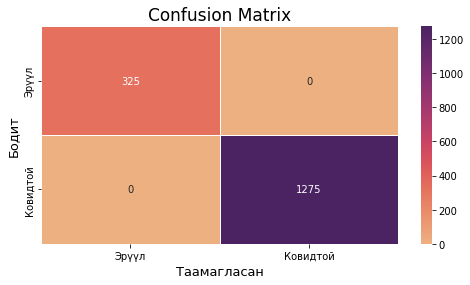


KNN Model:
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00      1275

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion Matrix:
 [[ 325    0]
 [   0 1275]]


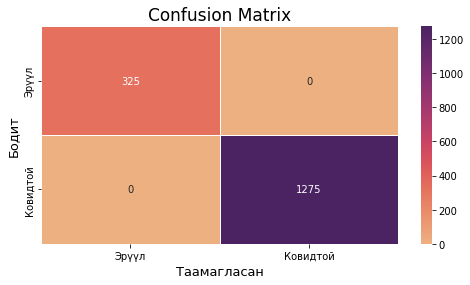


Logistic Regression Model:
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00      1275

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion Matrix:
 [[ 325    0]
 [   0 1275]]


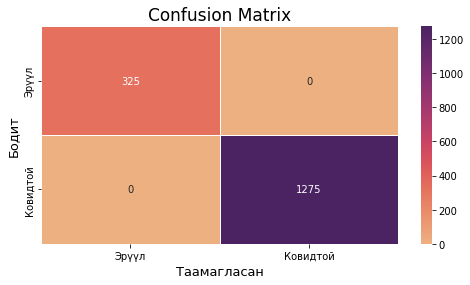


Random Forest Model:
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00      1275

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion Matrix:
 [[ 325    0]
 [   0 1275]]


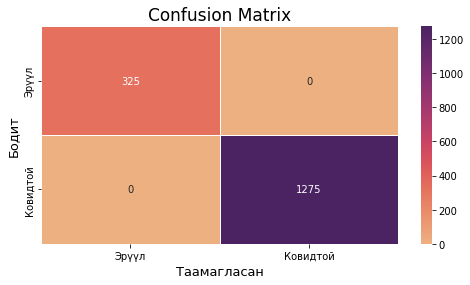

In [12]:
# Evaluate models
models = ['SVM', 'KNN', 'Logistic Regression', 'Random Forest']
predictions = [svm_predictions, knn_predictions, logistic_predictions, rf_predictions]

for i, model in enumerate(models):
    accuracy = accuracy_score(y_test, predictions[i])
    report = classification_report(y_test, predictions[i])
    cm = confusion_matrix(y_test, predictions[i])

    print(f"\n{model} Model:")
    print(f"Accuracy: {100*accuracy:.2f}%")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    fig, ax = plt.subplots(figsize=(8, 4)) 
    sns.heatmap(cm, 
                ax=ax,
                annot=True,
                cmap="flare",
                linewidth=.5,
                fmt='g', 
                xticklabels=['Эрүүл','Ковидтой'],
                yticklabels=['Эрүүл','Ковидтой'])
    plt.xlabel('Таамагласан',fontsize=13)
    plt.ylabel('Бодит',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

In [13]:
test_ds = pd.read_csv('../../input/clinical_sample/spectrum.csv')

In [14]:
test_ds.shape

(35, 1333)

In [15]:
display(test_ds.head().T)

,0,1,2,3,4
320,25.2983,20.30437,16.893959,-36.049651,-11.886235
321,31.479134,-3.791936,16.638892,-19.645126,-12.665922
322,35.972784,-22.084277,16.978177,-2.667237,-11.410453
323,42.426246,-23.550407,22.367232,9.265691,4.168963
324,50.000132,-10.324397,30.121312,16.180717,29.627829
...,...,...,...,...,...
1648,5.494818,1.140878,1.415732,-4.302907,-20.411472
1649,-5.673703,7.089428,2.36151,1.27773,-26.535186
1650,-11.573432,9.249651,-11.636861,-8.427642,-27.951783
covid_status,positive,positive,positive,positive,positive


In [49]:
_X_test = test_ds.drop(['covid_status', 'description'], axis=1)
_X_test.columns = _X_test.columns.astype(int)
_y_test = np.ones(_X_test.shape[0]).astype(int)


Random Forest Model:
Accuracy: 82.86%
Confusion Matrix:
 [[ 0  0]
 [ 6 29]]


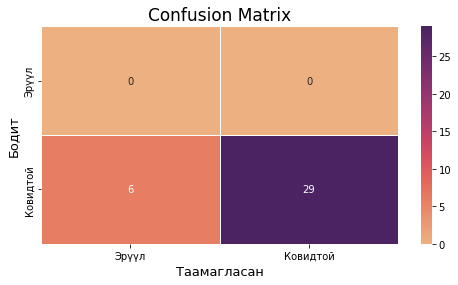

In [54]:
_y_pred = svm_model.predict(_X_test)
accuracy = accuracy_score(_y_test, _y_pred)
# report = classification_report(_y_test, _y_pred)
cm = confusion_matrix(_y_test, _y_pred)

print(f"\n{model} Model:")
print(f"Accuracy: {100*accuracy:.2f}%")
# print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

fig, ax = plt.subplots(figsize=(8, 4)) 
sns.heatmap(cm, 
            ax=ax,
            annot=True,
            cmap="flare",
            linewidth=.5,
            fmt='g', 
            xticklabels=['Эрүүл','Ковидтой'],
            yticklabels=['Эрүүл','Ковидтой'])
plt.xlabel('Таамагласан',fontsize=13)
plt.ylabel('Бодит',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()